Dataset shape: (648, 42)
        seq_id                                        instruction  \
0  20432503859  Write a function to find the length of the lon...   
1  17502749434  Write a python function to calculate the facto...   
2  34587679255  Write a function to find the largest square co...   
3  41957305571  Write a function that finds the length of the ...   
4  15993331365  Write a function to check if a given number is...   

                                              output  \
0  Here is the code to solve this problem: \n```p...   
1  Here is the code to solve this problem: \n```p...   
2  Here is the code to solve this problem: \n```p...   
3  Here is the code to solve this problem: \n```p...   
4  Here is the code to solve this problem: \n```p...   

                                                code  \
0  def longest_consecutive(nums):\n    if not num...   
1  def recursive_factorial(n):\n    if n == 1:\n ...   
2  def largest_square(matrix):\n    if not matrix...   

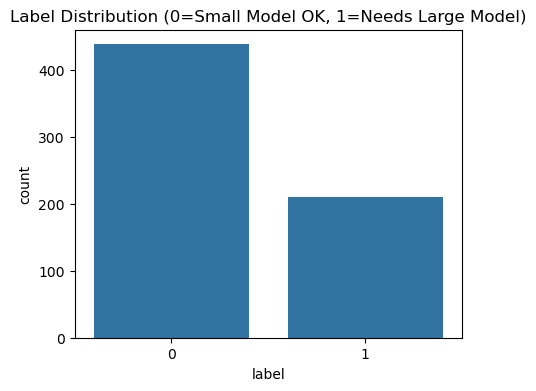

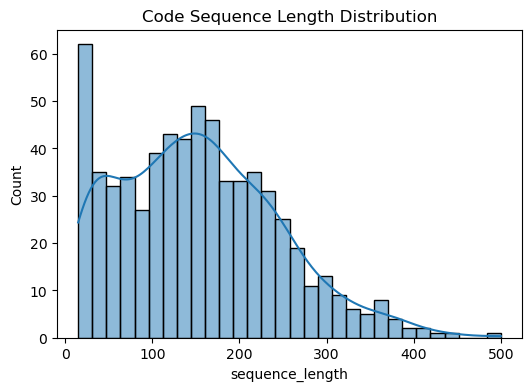

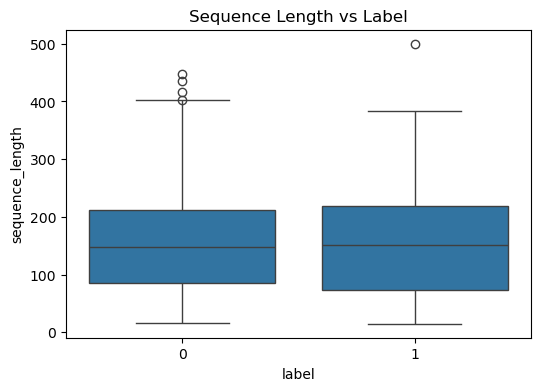

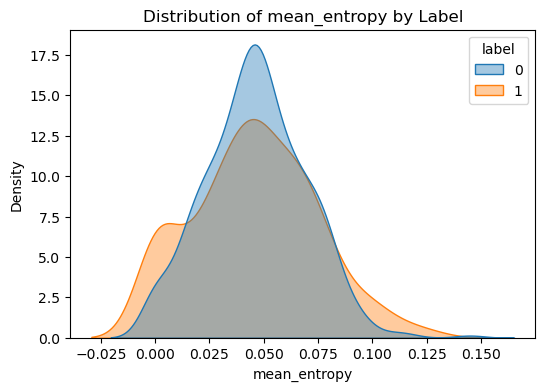

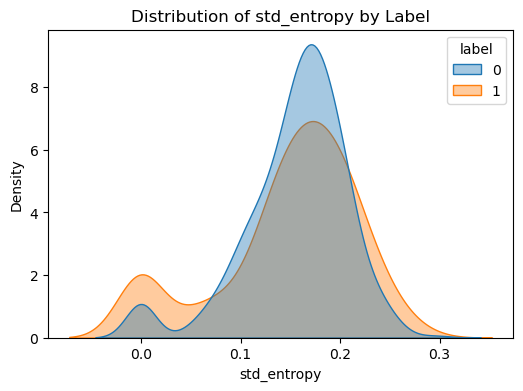

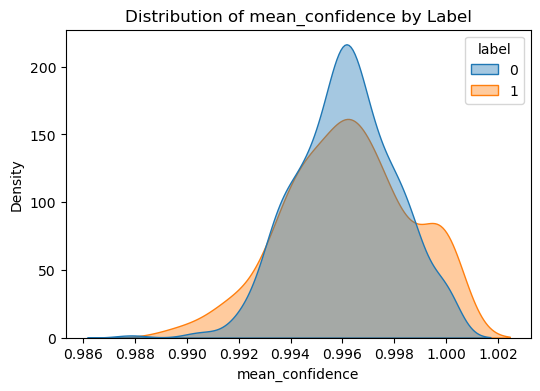

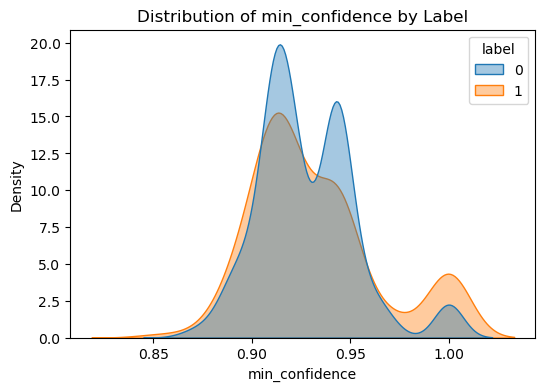

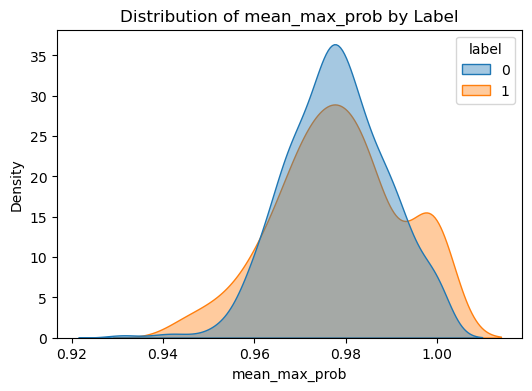

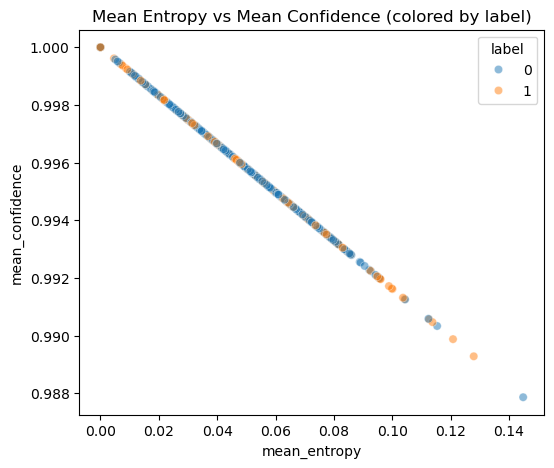

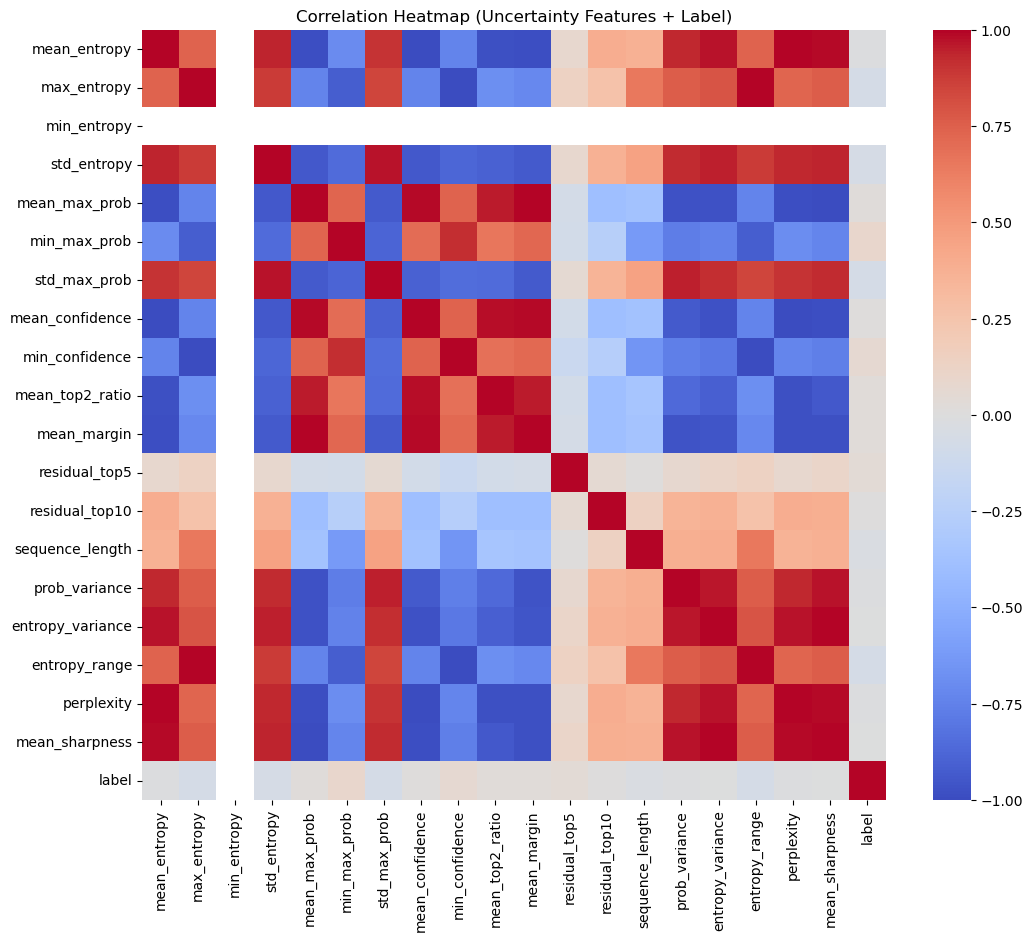

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        90
           1       0.43      0.25      0.32        40

    accuracy                           0.67       130
   macro avg       0.58      0.55      0.55       130
weighted avg       0.63      0.67      0.64       130



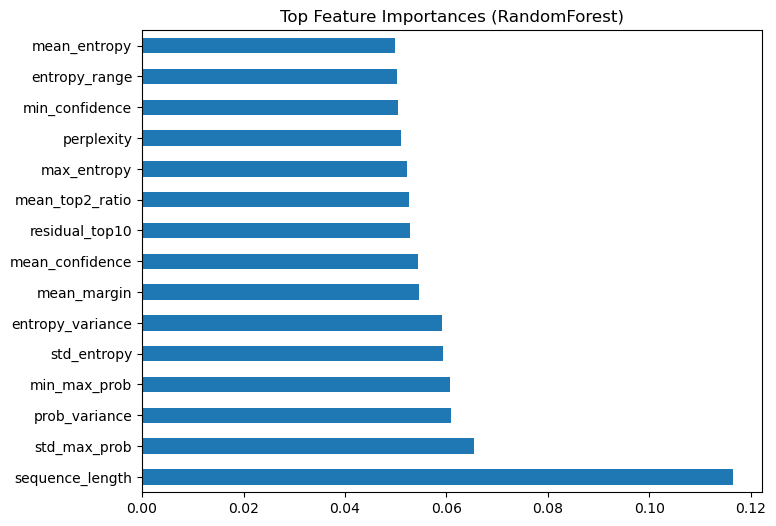

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Dataset ===
# Replace with your actual CSV/TSV path
df = pd.read_csv("C:\\Users\\s\\Desktop\\Dev\\SamsungProject\\best_test\\extract_data\\enhanced_router_dataset_emb4.csv")

# For quick check
print("Dataset shape:", df.shape)
print(df.head())

# === 1. Label Distribution ===
plt.figure(figsize=(5,4))
sns.countplot(x="label", data=df)
plt.title("Label Distribution (0=Small Model OK, 1=Needs Large Model)")
plt.show()

# === 2. Sequence Length Distribution ===
plt.figure(figsize=(6,4))
sns.histplot(df["sequence_length"], bins=30, kde=True)
plt.title("Code Sequence Length Distribution")
plt.xlabel("sequence_length")
plt.show()

# === 3. Pass/Fail vs Sequence Length ===
plt.figure(figsize=(6,4))
sns.boxplot(x="label", y="sequence_length", data=df)
plt.title("Sequence Length vs Label")
plt.show()

# === 4. Entropy & Confidence Distributions ===
features = ["mean_entropy", "std_entropy", "mean_confidence", "min_confidence", "mean_max_prob"]
for feat in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feat, hue="label", common_norm=False, fill=True, alpha=0.4)
    plt.title(f"Distribution of {feat} by Label")
    plt.show()

# === 5. Scatter: Entropy vs Confidence ===
plt.figure(figsize=(6,5))
sns.scatterplot(x="mean_entropy", y="mean_confidence", hue="label", data=df, alpha=0.5)
plt.title("Mean Entropy vs Mean Confidence (colored by label)")
plt.show()

# === 6. Correlation Heatmap (Features + Label) ===
uncertainty_cols = [
    "mean_entropy", "max_entropy", "min_entropy", "std_entropy",
    "mean_max_prob", "min_max_prob", "std_max_prob",
    "mean_confidence", "min_confidence", "mean_top2_ratio", "mean_margin",
    "residual_top5", "residual_top10", "sequence_length", "prob_variance",
    "entropy_variance", "entropy_range", "perplexity", "mean_sharpness"
]

corr = df[uncertainty_cols + ["label"]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Uncertainty Features + Label)")
plt.show()

# === 7. Quick Feature Importance (Optional) ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[uncertainty_cols]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

feat_imp = pd.Series(clf.feature_importances_, index=uncertainty_cols).sort_values(ascending=False)
plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='barh')
plt.title("Top Feature Importances (RandomForest)")
plt.show()
